In [ ]:
!pip install -Uqq fastai
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.FOOD)


In [ ]:
labelA = 'samosa'
labelB = 'cheesecake'
labelC = 'pho'
labelD = 'spring_rolls'
labelE = 'panna_cotta'
labelF = 'ice_cream	'

In [ ]:
for img in get_image_files(path):
  #Rename Images so that the Label (Samosa or Churros) is in the file name
  if labelA in str(img):
    img.rename(f"{img.parent}/{labelA}-{img.name}")
  elif labelB in str(img):
    img.rename(f"{img.parent}/{labelB}-{img.name}")
  elif labelC in str(img):
    img.rename(f"{img.parent}/{labelC}-{img.name}")
  elif labelD in str(img):
    img.rename(f"{img.parent}/{labelD}-{img.name}")
  elif labelE in str(img):
    img.rename(f"{img.parent}/{labelE}-{img.name}")
  elif labelF in str(img):
    img.rename(f"{img.parent}/{labelF}-{img.name}")
  else: os.remove(img) #If the Images are not part of labelA or labelB



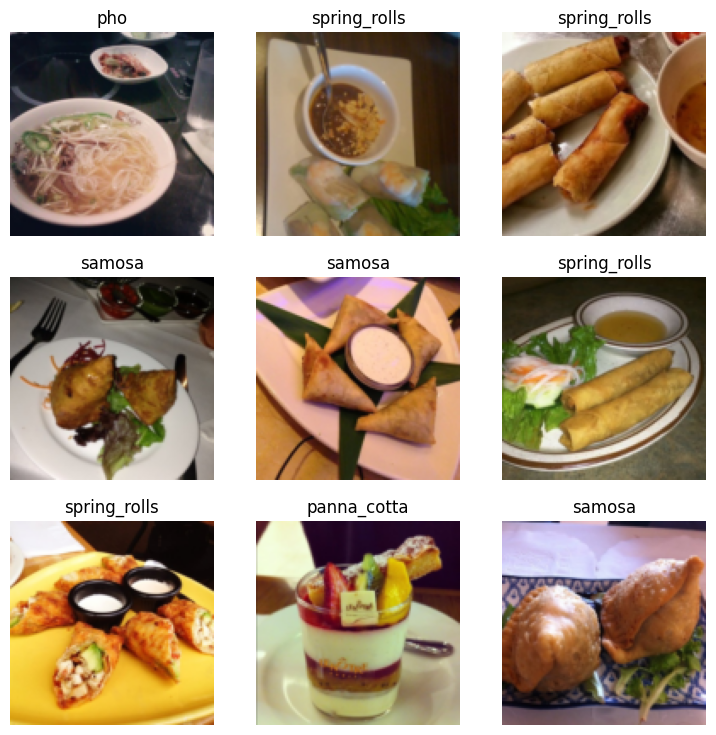

In [ ]:
def GetLabel(fileName):
  return fileName.split('-')[0]

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=420,
    label_func=GetLabel, item_tfms=Resize(120))

dls.train.show_batch()

In [ ]:
# Using CNN
learn = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=3)

Saving Screenshot 2024-10-13 at 4.21.23 PM.png to Screenshot 2024-10-13 at 4.21.23 PM.png


This is a samosa.


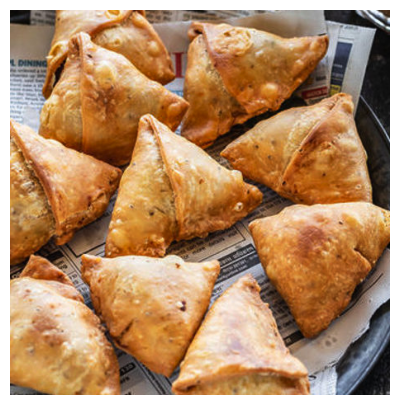

In [ ]:
from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]

img = PILImage.create(uploadedImg)
img.show()

label,_,probs = learn.predict(img)

print(f"This is a {label}.")


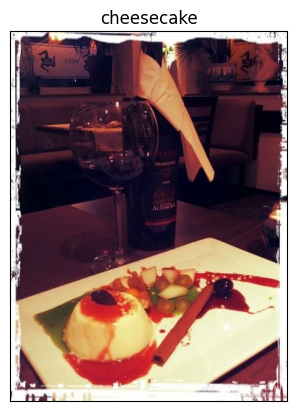

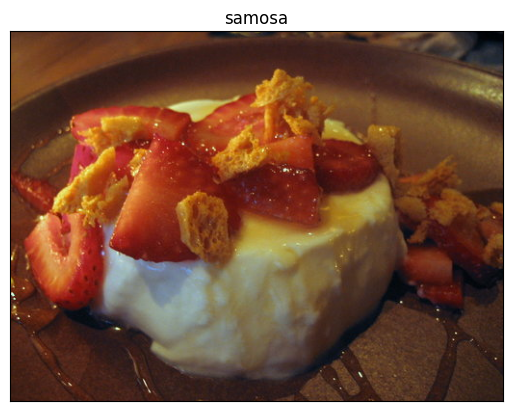

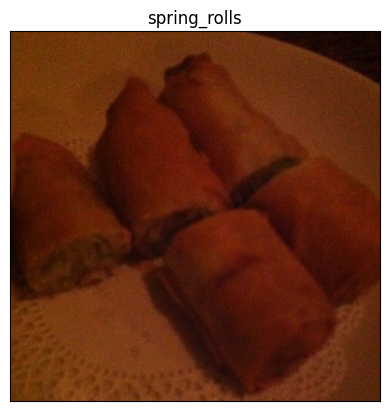

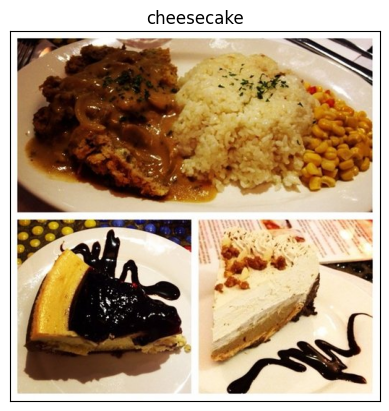

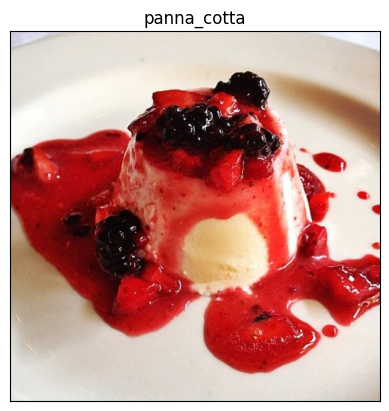

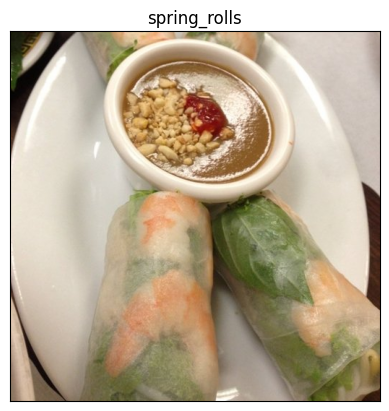

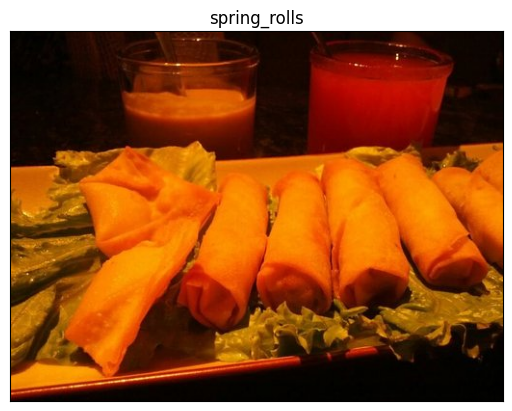

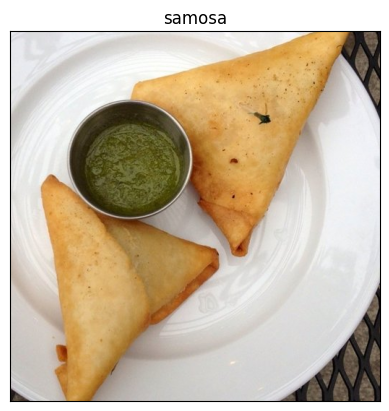

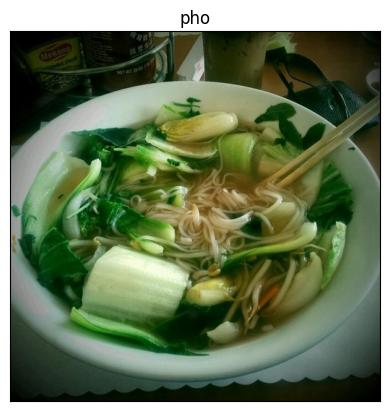

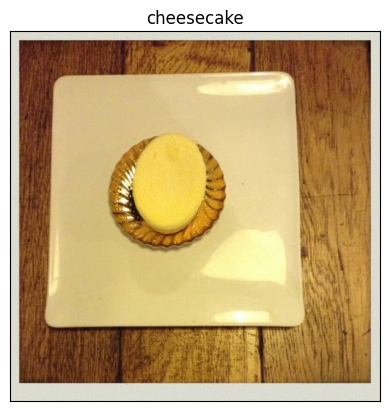

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,10):
  #Load random image
  randomIndex = random.randint(0, len(get_image_files(path))-1)
  img = mpimg.imread(get_image_files(path)[randomIndex])
  #Put into Model
  label,_,probs = learn.predict(img)

  #Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot() 
  imgplot = plt.imshow(img) #Add Image into Plot
  ax.set_title(label) #Set Headline to predicted label

  #Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

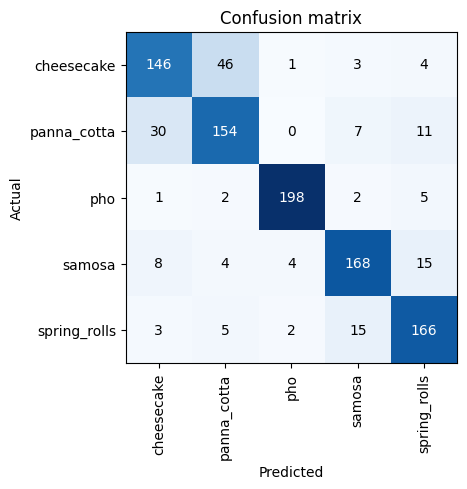

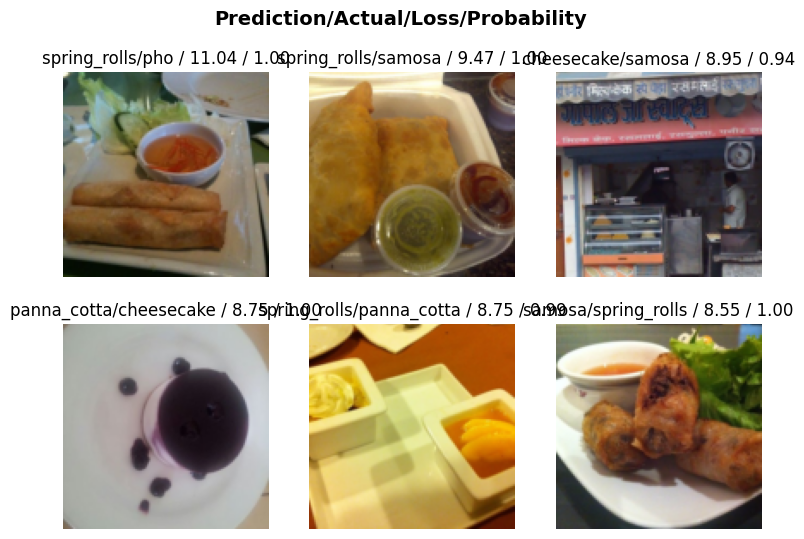

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(6)